# Assignment

## Importing Libraries

In [9]:
import numpy as np
import torch
import torchvision
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Datasets

In [10]:
cifar_dataset_train = datasets.CIFAR10(root='./data',train=True,download=True,transform=torchvision.transforms.ToTensor())

cifar_dataset_test = datasets.CIFAR10(root='./data',train=False,download=True,transform=torchvision.transforms.ToTensor())

Files already downloaded and verified
Files already downloaded and verified


## Creating the training dataset

In [11]:
from torch.utils.data import DataLoader
batch_size = 256

train_iter = DataLoader(cifar_dataset_train,batch_size,shuffle=True)

In [12]:
X,y = next(iter(train_iter))

## Creating the test dataset

In [13]:
test_iter = DataLoader(cifar_dataset_test,batch_size,shuffle=True)

In [14]:
X_test,y_test = next(iter(test_iter))

## Analysing the CIFAR-10 data

In [15]:
print(f'The dimensions of each input image is {X.size()} The number of input channels is {X.size()[1]}')
print(f'The output labels are as follows {y}')

The dimensions of each input image is torch.Size([256, 3, 32, 32]) The number of input channels is 3
The output labels are as follows tensor([6, 3, 1, 3, 8, 6, 5, 7, 9, 5, 9, 1, 8, 9, 2, 8, 2, 5, 3, 9, 3, 6, 3, 6,
        5, 3, 1, 7, 6, 8, 5, 9, 1, 4, 1, 6, 4, 9, 3, 4, 7, 5, 9, 2, 4, 2, 9, 8,
        1, 6, 1, 7, 6, 3, 7, 3, 0, 1, 8, 0, 3, 6, 5, 7, 9, 4, 3, 3, 3, 0, 9, 6,
        0, 6, 0, 6, 1, 8, 9, 3, 7, 2, 7, 6, 8, 0, 3, 0, 1, 5, 3, 8, 6, 3, 2, 0,
        0, 0, 1, 8, 0, 1, 2, 5, 4, 1, 5, 9, 9, 0, 5, 5, 8, 9, 4, 4, 3, 5, 1, 8,
        6, 4, 5, 4, 5, 3, 1, 8, 8, 0, 9, 5, 0, 0, 0, 8, 1, 1, 2, 2, 6, 3, 5, 0,
        1, 9, 1, 6, 0, 3, 4, 8, 5, 2, 6, 4, 6, 0, 0, 2, 7, 5, 0, 1, 6, 3, 9, 9,
        5, 1, 6, 5, 9, 5, 6, 5, 4, 6, 4, 7, 2, 2, 1, 8, 2, 8, 7, 3, 5, 6, 8, 4,
        6, 3, 2, 8, 6, 9, 5, 8, 9, 5, 2, 7, 4, 8, 8, 0, 2, 3, 5, 0, 4, 3, 5, 8,
        4, 6, 5, 0, 1, 0, 4, 1, 9, 8, 4, 2, 2, 9, 6, 5, 8, 9, 4, 3, 9, 0, 2, 5,
        8, 5, 3, 3, 3, 1, 5, 9, 8, 6, 3, 1, 3, 3, 6, 4])


## Example image

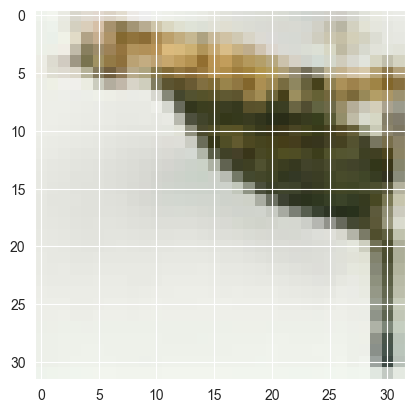

In [22]:
plt.imshow(X[1].T)

## CNN Architecture

- The output features for the basic linear layer has match the number of convolutions
- check if the input to the convolution should be in one or 2 dimensions

In [ ]:
class CNN(torch.nn.Module):
    def __init__(self,num_inputs,num_channels,num_outputs):
        super(CNN,self).__init__()
        self.num_inputs = num_inputs
        self.num_channels = num_channels
        self.num_outputs = num_outputs

        #Spatial/Global Pooling for input

        # Design the base block Element
        # Create an input linear layer for future combination
        self.linear1 = torch.nn.Linear(num_inputs,out_features=2)
        self.relu1 = torch.nn.ReLU()

        self.conv1 = torch.nn.Conv2d(num_channels,out_channels=18,kernel_size=5,stride=1,padding=1)
        self.relu2 = torch.nn.ReLU()

        self.conv2 = torch.nn.Conv2d(num_channels,out_channels=36,kernel_size=5,stride=1,padding=1)
        self.relu3 = torch.nn.ReLU()

        #Linear combination of block components

    def forward(self,x):
        x =